<a href="https://colab.research.google.com/github/Kartik-loop/personal-expense-data-analysis/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files


In [8]:
#Upload CSV Using Code
uploaded = files.upload()

Saving expenses_dataset.csv to expenses_dataset (1).csv


In [9]:
#Load Uploaded File into Pandas
df = pd.read_csv("expenses_dataset.csv")
print("Dataset loaded successfully")


Dataset loaded successfully


In [10]:
#Preview Dataset
df.head()


,UserID,Year,Month,Income,Income_Bracket,Festivals,Festival_Count,Food,Groceries,Transport,...,Savings,Food_Ratio,Groceries_Ratio,Transport_Ratio,Entertainment_Ratio,Shopping_Ratio,Rent_Ratio,Bills_Ratio,Healthcare_Ratio,Education_Ratio
0,USER_012,2021,1,7268.67,4,New Year's Day,1,551.13,879.47,633.01,...,605.61,0.0758,0.1210,0.0871,0.0919,0.0650,0.2144,0.1379,0.0493,0.0742
1,USER_014,2021,1,5017.75,3,New Year's Day,1,446.65,683.99,502.62,...,-1.66,0.0890,0.1363,0.1002,0.0898,0.0682,0.2701,0.1166,0.0567,0.0734
2,USER_020,2021,1,2646.92,1,New Year's Day,1,241.63,399.62,237.00,...,12.50,0.0913,0.1510,0.0895,0.0951,0.0701,0.2640,0.1287,0.0441,0.0616
3,USER_023,2021,1,8131.00,4,New Year's Day,1,646.30,1055.70,761.08,...,598.61,0.0795,0.1298,0.0936,0.0683,0.0836,0.2494,0.1136,0.0532,0.0553
4,USER_039,2021,1,7702.83,4,New Year's Day,1,665.16,895.81,779.55,...,-18.64,0.0864,0.1163,0.1012,0.0907,0.0772,0.2839,0.1363,0.0509,0.0595


In [11]:
#Dataset Structure Check
print("Shape:", df.shape)
print("\nColumns:")
print(df.columns)


Shape: (3655, 27)

Columns:
Index(['UserID', 'Year', 'Month', 'Income', 'Income_Bracket', 'Festivals',
       'Festival_Count', 'Food', 'Groceries', 'Transport', 'Entertainment',
       'Shopping', 'Rent', 'Bills', 'Healthcare', 'Education',
       'Total_Expenses', 'Savings', 'Food_Ratio', 'Groceries_Ratio',
       'Transport_Ratio', 'Entertainment_Ratio', 'Shopping_Ratio',
       'Rent_Ratio', 'Bills_Ratio', 'Healthcare_Ratio', 'Education_Ratio'],
      dtype='object')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3655 entries, 0 to 3654
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UserID               3655 non-null   object 
 1   Year                 3655 non-null   int64  
 2   Month                3655 non-null   int64  
 3   Income               3655 non-null   float64
 4   Income_Bracket       3655 non-null   int64  
 5   Festivals            3655 non-null   object 
 6   Festival_Count       3655 non-null   int64  
 7   Food                 3655 non-null   float64
 8   Groceries            3655 non-null   float64
 9   Transport            3655 non-null   float64
 10  Entertainment        3655 non-null   float64
 11  Shopping             3655 non-null   float64
 12  Rent                 3655 non-null   float64
 13  Bills                3655 non-null   float64
 14  Healthcare           3655 non-null   float64
 15  Education            3655 non-null   f

Data Cleaning & Validation


In [20]:
#Creating a Safe Copy of Data
df_clean = df.copy()


In [21]:
#Checking Missing Values & Handle Missing Values
df_clean.isnull().sum()
num_cols = df_clean.select_dtypes(include='number').columns
cat_cols = df_clean.select_dtypes(include='object').columns

# Fill missing values
df_clean[num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].median())
df_clean[cat_cols] = df_clean[cat_cols].fillna(df_clean[cat_cols].mode().iloc[0])


In [22]:
#Validate & Fix Date Column
if 'Date' in df_clean.columns:
    df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce')


In [23]:
#Handle Invalid / Negative Values
if 'Savings' in df_clean.columns:
    df_clean['Savings'] = df_clean['Savings'].clip(lower=0)


In [24]:
#Remove Duplicate Records (If Any)
duplicates = df_clean.duplicated().sum()
print("Duplicate rows:", duplicates)

df_clean = df_clean.drop_duplicates()


Duplicate rows: 0


In [25]:
#Validation Check
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3655 entries, 0 to 3654
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UserID               3655 non-null   object 
 1   Year                 3655 non-null   int64  
 2   Month                3655 non-null   int64  
 3   Income               3655 non-null   float64
 4   Income_Bracket       3655 non-null   int64  
 5   Festivals            3655 non-null   object 
 6   Festival_Count       3655 non-null   int64  
 7   Food                 3655 non-null   float64
 8   Groceries            3655 non-null   float64
 9   Transport            3655 non-null   float64
 10  Entertainment        3655 non-null   float64
 11  Shopping             3655 non-null   float64
 12  Rent                 3655 non-null   float64
 13  Bills                3655 non-null   float64
 14  Healthcare           3655 non-null   float64
 15  Education            3655 non-null   f

In [26]:
important_cols = [
    'Date',
    'Income',
    'Total_Expenses',
    'Savings',
    'Food',
    'Rent',
    'Shopping',
    'Transport'
]

# Keep only columns that exist
important_cols = [col for col in important_cols if col in df_clean.columns]

df_eda = df_clean[important_cols]


In [27]:
df_eda.describe()


,Income,Total_Expenses,Savings,Food,Rent,Shopping,Transport
count,3655.000000,3655.000000,3655.000000,3655.000000,3655.000000,3655.000000,3655.000000
mean,6470.617220,6114.907272,383.276131,561.769395,1612.510536,490.894564,649.479647
std,3083.487956,2939.614347,364.789931,291.469082,795.691436,263.520904,323.235301
min,1676.330000,1534.710000,0.000000,114.740000,355.720000,84.630000,142.130000
25%,3941.190000,3703.965000,98.995000,330.260000,964.275000,287.145000,383.695000
50%,6247.420000,5862.350000,291.480000,524.490000,1522.310000,452.410000,609.560000
75%,8325.125000,7927.440000,571.945000,730.740000,2126.685000,632.420000,853.125000
max,16086.550000,16926.010000,2282.890000,1770.860000,4815.010000,2066.350000,1905.690000


In [28]:
total_income = df_eda['Income'].sum()
total_expense = df_eda['Total_Expenses'].sum()
total_savings = df_eda['Savings'].sum()

print("Total Income:", total_income)
print("Total Expenses:", total_expense)
print("Total Savings:", total_savings)


Total Income: 23650105.94
Total Expenses: 22349986.08
Total Savings: 1400874.26


In [29]:
expense_categories = ['Food', 'Rent', 'Shopping', 'Transport']
expense_categories = [c for c in expense_categories if c in df_eda.columns]

category_totals = df_eda[expense_categories].sum()
category_totals


,0
Food,2053267.14
Rent,5893726.01
Shopping,1794219.63
Transport,2373848.11


In [36]:
if 'Date' in df_eda.columns:
    df_eda['Month'] = df_eda['Date'].dt.to_period('M')
    monthly_expense = df_eda.groupby('Month')['Total_Expenses'].mean()
    monthly_expense



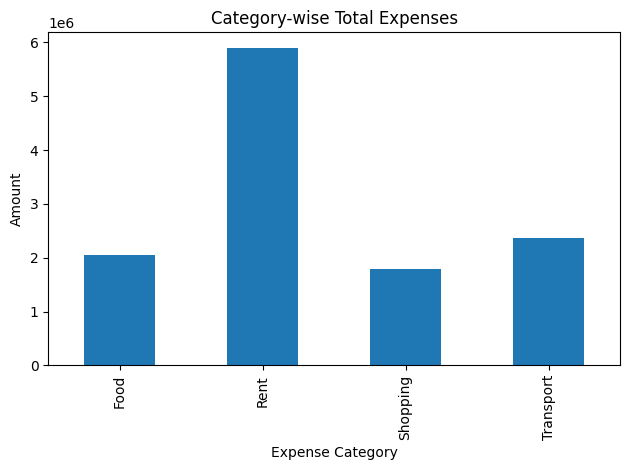

In [31]:
plt.figure()
category_totals.plot(kind='bar')
plt.title("Category-wise Total Expenses")
plt.xlabel("Expense Category")
plt.ylabel("Amount")
plt.tight_layout()
plt.show()


In [39]:
temp_df = df_clean.copy()
temp_df['Date_calc'] = pd.to_datetime(temp_df['Year'].astype(str) + '-' + temp_df['Month'].astype(str) + '-01')
# Calculate the average monthly expense
monthly_expense = temp_df.groupby(temp_df['Date_calc'].dt.to_period('M'))['Total_Expenses'].mean()


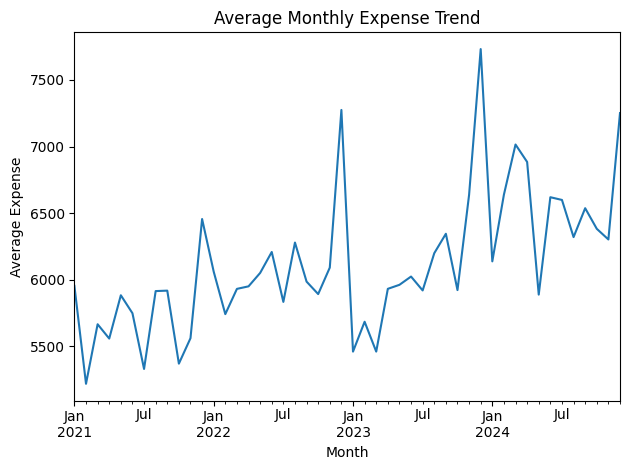

In [40]:
# Plot the average monthly expense
plt.figure()
monthly_expense.plot()
plt.title("Average Monthly Expense Trend")
plt.xlabel("Month")
plt.ylabel("Average Expense")
plt.tight_layout()
plt.show()

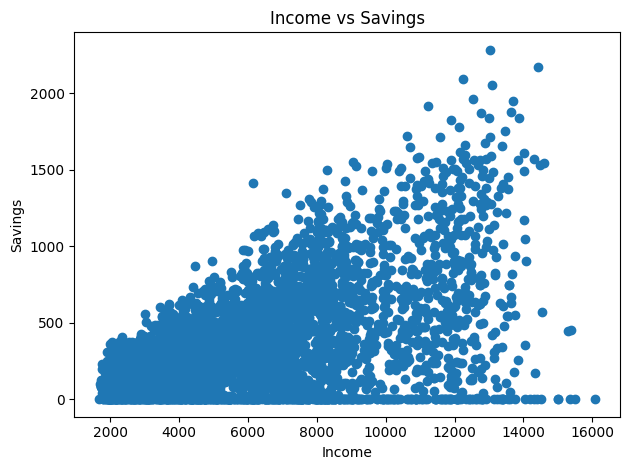

In [41]:
plt.figure()
plt.scatter(df_eda['Income'], df_eda['Savings'])
plt.title("Income vs Savings")
plt.xlabel("Income")
plt.ylabel("Savings")
plt.tight_layout()
plt.show()
